<a href="https://colab.research.google.com/github/kranov582/mvp-2/blob/main/mvp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning & Analytics

>


## Pedro Augusto Boller


## 1 Definição do Problema

 O presente trabalho tem como objetivo a análise e a aplicação de modelos de aprendizado de máquina do tipo regressão em um dataset que trata de uma pesquisa sobre a qualidade do sono.

Nos dados analisados, constam informações relevantes sobre algumas caracteristicas do sono dos pacientes, e alguns outros dados.

O dataset foi baixado do website kaggle, e está disponivel no link abaixo:

https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency


O problema em questão é a análise da qualidade do sono com base em um dataset contendo informações relacionadas a características do sono de pacientes. O objetivo é aplicar modelos de aprendizado de máquina do tipo regressão para entender os fatores que afetam a qualidade do sono e fazer previsões com base nesses dados.


**Premissas ou hipóteses sobre o problema:**


Com base nas informações fornecidas, algumas premissas ou hipóteses possíveis sobre o problema podem ser:


*   Existe uma relação entre a eficiência do sono e as características como duração do sono, estágios específicos do sono (REM, sono pesado, sono leve), quantidade de vezes que o paciente acorda durante o sono, consumo de cafeína e álcool, status de fumante e frequência de exercícios.
*   A idade e o gênero podem ter impacto na qualidade do sono.
*   Os padrões de sono podem variar entre os indivíduos.


**Restrições ou condições para seleção dos dados:**

Não existe nenhuma restrição para a seleção dos dados.

**Descrição do dataset:**

O dataset contém os seguintes atributos:

**ID**: Id unico do paciente\
**Age**: Idade do paciente\
**Gender**: Genero do paciente\
**Bedtime**: Horario em que o paciente foi dormir\
**Wakeup time**: Horario em que o paciente acordou\
**Sleep duration**: Duração do sono\
**Sleep efficiency**: Eficiencia do sono\
**REM sleep percentage**: Duração em porcentagem do estagio de sono REM (rapid eye movement)\
**Deep sleep percentage**: Duração em porcentagem do sono pesado\
**Light sleep percentage**: Duração em porcentagem do sono leve\
**Awakenings**: Quantidade de vezes que o paciente acordou durante o periodo de sono\
**Caffeine consumption**: Quantidade em mg de cafeina que o paciente ingeriu nas ultimas 24 horas antes de dormir\
**Alcohol consumption**: Quantidade em oz de alcool que o paciente ingeriu nas ultimas 24 horas antes de dormir\
**Smoking status**: Indica se o paciente é fumante ou não\
**Exercise frequency**: Quantidade de vezes que o paciente se exercita em media por semana



In [38]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_regression # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

In [39]:
# Para mostrar todas as linhas do pandas
pd.set_option('display.max_rows', None)

# Para mostrar todas as colunas do pandas
pd.set_option('display.max_columns', None)

### 1.1 Carga do Dataset

In [40]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/kranov582/mvp-2/main/Sleep_Efficiency.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


## 2 Preparação de Dados

Nesta etapa será feito um pré processamento nos dados

Separe o dataset entre treino e teste (e validação, se aplicável).
Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.
Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.
Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.

In [41]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

O dataset possui alguns valores nulos, que precisam ser tratados para que seja possivel aplicar os modelos de machine learning de regressão. Além disso, o dataset possui dois atributos com valores de data, que tambem precisam ser tratados para que os dados possam ser aproveitados pelo modelo.

In [42]:
dataset.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [43]:
# Como os dados faltantes estão presentes em varias colunas,
#e representam uma porcentagem pequena do dataset, a melhor escolha nesse caso é
# substituir os valores nulos pela moda de cada coluna.
dataset_processado = dataset.fillna(dataset.mode().iloc[0])

In [44]:
dataset_processado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              452 non-null    float64
 11  Caffeine consumption    452 non-null    float64
 12  Alcohol consumption     452 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      452 non-null    fl

In [45]:
dataset_processado.nunique()

ID                        452
Age                        61
Gender                      2
Bedtime                   424
Wakeup time               434
Sleep duration              9
Sleep efficiency           50
REM sleep percentage       13
Deep sleep percentage      29
Light sleep percentage     29
Awakenings                  5
Caffeine consumption        6
Alcohol consumption         6
Smoking status              2
Exercise frequency          6
dtype: int64

O dataset possui dois atributos com valores de data/hora, que são a Bedtime e a Wakeup time. Os dados nesse formato não seriam compativeis com os modelos de machine learning mais comuns, e então precisam ser transformados de alguma forma ou descartados. Como o numero de atributos já é pequeno, decidi trasformar estes dados em um formato que faça sentido, e possa ajudar o modelo a ter um melhor resultado.

Minha ideia foi retirar a parte do dia e deixar apenas a hora, e depois trasnformar para minutos. Assim é possivel ter uma variavel numerica que indica o horario em que o paciente foi dormir e o horario em que acordou, e será possivel analisar se estes dados possuem alguma relevancia para a qualidade do sono.

In [46]:
#Transformando os dados de object para datetime
dataset_processado['Bedtime'] = pd.to_datetime(dataset_processado['Bedtime'])
dataset_processado['Wakeup_Time'] = pd.to_datetime(dataset_processado['Wakeup time'])

#Dropando a coluna que foi transformada(mudou o nome)
dataset_processado = dataset_processado.drop(columns = 'Wakeup time')

#Retirando a parte de tempo dos dados de data/hora
dataset_processado['Bedtime'] = dataset_processado['Bedtime'].dt.strftime('%H:%M:%S')
dataset_processado['Wakeup_Time'] = dataset_processado['Wakeup_Time'].dt.strftime('%H:%M:%S')

In [47]:
#Função para converter os dados de cada linha de horas para minutos
def convert_to_minutes(time_str):
    hours, minutes, _ = map(int, time_str.split(':'))
    return hours * 60 + minutes

In [48]:
#Aplicando a função nos atributos do dataset
dataset_processado['Wakeup_Time_Minutes'] = dataset_processado['Wakeup_Time'].apply(convert_to_minutes)
dataset_processado['Bedtime_Minutes'] = dataset_processado['Bedtime'].apply(convert_to_minutes)

#Removendo as colunas antigas
dataset_processado = dataset_processado.drop(columns = ['Bedtime', 'Wakeup_Time'])

In [49]:
dataset_processado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Sleep duration          452 non-null    float64
 4   Sleep efficiency        452 non-null    float64
 5   REM sleep percentage    452 non-null    int64  
 6   Deep sleep percentage   452 non-null    int64  
 7   Light sleep percentage  452 non-null    int64  
 8   Awakenings              452 non-null    float64
 9   Caffeine consumption    452 non-null    float64
 10  Alcohol consumption     452 non-null    float64
 11  Smoking status          452 non-null    object 
 12  Exercise frequency      452 non-null    float64
 13  Wakeup_Time_Minutes     452 non-null    int64  
 14  Bedtime_Minutes         452 non-null    in

Ainda temos outro problema para resolver, as colunas de Gender e Smoking status estão com formato catégorico. É necessario trasformar para o formato numérico.

Como os dois atributos possuem apenas duas classes cada um, é possivel usar o LabelEncoder para transformar os dados para variaveis numéricas.

In [50]:
# Inicializando o LabelEncoder
le = LabelEncoder()

# Aplicando o LabelEncoder às colunas
dataset_processado['Gender'] = le.fit_transform(dataset_processado['Gender'])
dataset_processado['Smoking status'] = le.fit_transform(dataset_processado['Smoking status'])

In [51]:
#Selecionando as colunas que serão usadas no modelo. Foi retirado apenas a coluna
# "ID", pois não tem relevancia.
dataset_ML = dataset_processado[['Age', 'Gender', 'Bedtime_Minutes',
                                'Wakeup_Time_Minutes', 'Sleep duration',
                                'REM sleep percentage','Deep sleep percentage',
                                'Light sleep percentage', 'Awakenings',
                                'Caffeine consumption', 'Alcohol consumption',
                                'Smoking status', 'Exercise frequency',
                                'Sleep efficiency']]

In [52]:
dataset_ML.head()

,Age,Gender,Bedtime_Minutes,Wakeup_Time_Minutes,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep efficiency
0,65,0,60,420,6.0,18,70,12,0.0,0.0,0.0,1,3.0,0.88
1,69,1,120,540,7.0,19,28,53,3.0,0.0,3.0,1,3.0,0.66
2,40,0,1290,330,8.0,20,70,10,1.0,0.0,0.0,0,3.0,0.89
3,40,0,150,510,6.0,23,25,52,3.0,50.0,5.0,1,1.0,0.51
4,57,1,60,540,8.0,27,55,18,3.0,0.0,3.0,0,3.0,0.76


Agora o dataset está pronto para ser usado nos modelos.

#### 1.2.1 Separação em conjunto de treino e conjunto de teste com holdout

Como o número de atributos é pequeno, serão feitos dois testes: Um com o numero atual de atributos (13) e outro com um numero reduzido dos atributos mais importantes, e ai será comparado qual dos dois modelos téra um resultado melhor.

In [53]:
dataset_ML.shape

(452, 14)

In [54]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 9 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset_ML.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # holdout

# Parâmetros e partições da validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada

#### 1.2.3 Separação em treino e teste com o feature selection

Agora será criado outro conjunto de treino e teste, com o feature selection.

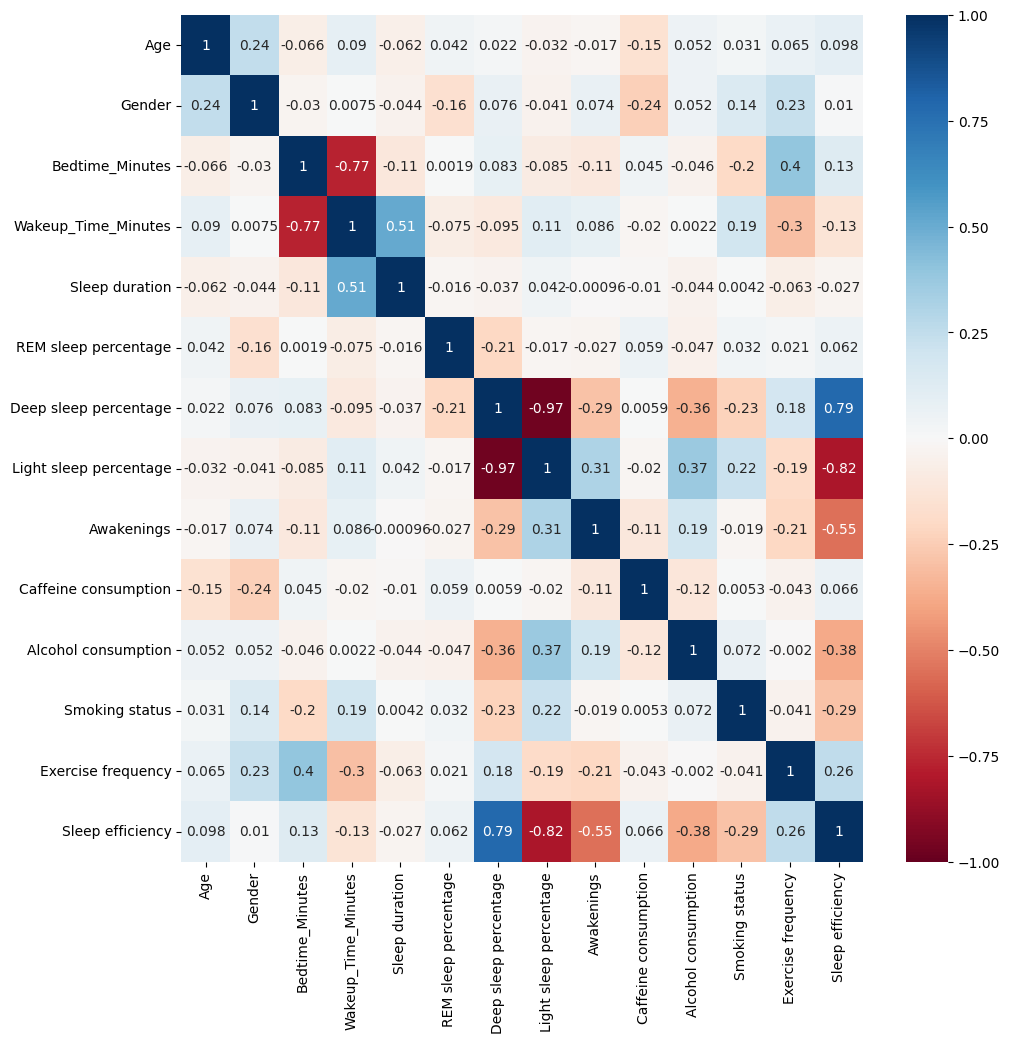

In [55]:
fig, ax = plt.subplots (figsize=(11, 11))
sns.heatmap(dataset_ML.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

In [56]:
import pandas as pd

# Calcula a matriz de correlação
corr_matrix = dataset_ML.corr()

# Seleciona apenas as correlações da variável alvo (sleep efficiency)
target_corr = corr_matrix['Sleep efficiency']

# Classifica as correlações em ordem decrescente
sorted_corr = target_corr.drop('Sleep efficiency').apply(lambda x:abs(x)).sort_values(ascending=False)

# Imprime as correlações em ordem decrescente
print(sorted_corr)

Light sleep percentage    0.819204
Deep sleep percentage     0.787335
Awakenings                0.552179
Alcohol consumption       0.381249
Smoking status            0.290026
Exercise frequency        0.255315
Wakeup_Time_Minutes       0.133537
Bedtime_Minutes           0.125971
Age                       0.098357
Caffeine consumption      0.065750
REM sleep percentage      0.062362
Sleep duration            0.027467
Gender                    0.010062
Name: Sleep efficiency, dtype: float64


Analisando as correlações acima, foi possivel concluir que os atributos mais importantes para a variavel target são (considerando pelo menos 0,2 de correlação):

Light sleep percentage, Deep sleep percentage, Awakenings, Alcohol consumption, Smoking status e exercice frequency.

Vamos tentar aplicar o SelectKBest tambem, para ver se chegamos no mesmo resultado

In [57]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_regression, k=6)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:13])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset_ML.columns[0:13]))


Número original de atributos: 13

Número reduzido de atributos: 6

Atributos Originais: Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption'],
      dtype='object')

Scores dos Atributos Originais: [4.396e+00 4.556e-02 7.256e+00 8.170e+00 3.397e-01 1.757e+00 7.339e+02
 9.182e+02 1.974e+02 1.954e+00 7.653e+01 4.133e+01 3.138e+01]

Atributos Selecionados: ['Deep sleep percentage' 'Light sleep percentage' 'Awakenings'
 'Alcohol consumption' 'Smoking status' 'Exercise frequency']


A função apontou as mesmos atributos. Vamos aplicar os modelos nestas 6 variaveis e comparar os resultados no final

In [58]:
dataset_ML_FS = dataset_processado[['Deep sleep percentage', 'Light sleep percentage',
                                    'Awakenings', 'Alcohol consumption',
                                    'Smoking status', 'Exercise frequency', 'Sleep efficiency']]

In [59]:
dataset_ML_FS.head()

,Deep sleep percentage,Light sleep percentage,Awakenings,Alcohol consumption,Smoking status,Exercise frequency,Sleep efficiency
0,70,12,0.0,0.0,1,3.0,0.88
1,28,53,3.0,3.0,1,3.0,0.66
2,70,10,1.0,0.0,0,3.0,0.89
3,25,52,3.0,5.0,1,1.0,0.51
4,55,18,3.0,3.0,0,3.0,0.76


In [60]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 9 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset_ML_FS.values
X_FS = array[:,0:6]
y_FS = array[:,6]
X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X_FS, y_FS,
    test_size=test_size, shuffle=True, random_state=seed) # holdout

# Parâmetros e partições da validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada

## 3 Modelagem e Treinamento

Nessa etapa o modelo será treinado usando os dados originais e os reduzidos com a aplicação do feature selection

### 3.1 Criação e avaliação de modelos: dados padronizados e normalizados

Nessa etapa, os dados

In [61]:
final_results = pd.DataFrame(columns = ['Modelo', 'RMSE'])

RL-orig: MSE 0.00388 (0.00097) - RMSE 0.06232
Ridge-orig: MSE 0.00388 (0.00097) - RMSE 0.06231
Lasso-orig: MSE 0.01075 (0.00105) - RMSE 0.10367
KNN-orig: MSE 0.00909 (0.00192) - RMSE 0.09532
CART-orig: MSE 0.00522 (0.00149) - RMSE 0.07227
SVM-orig: MSE 0.00925 (0.00097) - RMSE 0.09619
RL-padr: MSE 0.00390 (0.00097) - RMSE 0.06247
Ridge-padr: MSE 0.00388 (0.00097) - RMSE 0.06231
Lasso-padr: MSE 0.01719 (0.00190) - RMSE 0.13110
KNN-padr: MSE 0.00388 (0.00110) - RMSE 0.06226
CART-padr: MSE 0.00502 (0.00152) - RMSE 0.07084
SVM-padr: MSE 0.00499 (0.00066) - RMSE 0.07066
RL-norm: MSE 0.00388 (0.00098) - RMSE 0.06231
Ridge-norm: MSE 0.00387 (0.00095) - RMSE 0.06223
Lasso-norm: MSE 0.01719 (0.00190) - RMSE 0.13110
KNN-norm: MSE 0.00425 (0.00118) - RMSE 0.06521
CART-norm: MSE 0.00487 (0.00164) - RMSE 0.06977
SVM-norm: MSE 0.00456 (0.00064) - RMSE 0.06755


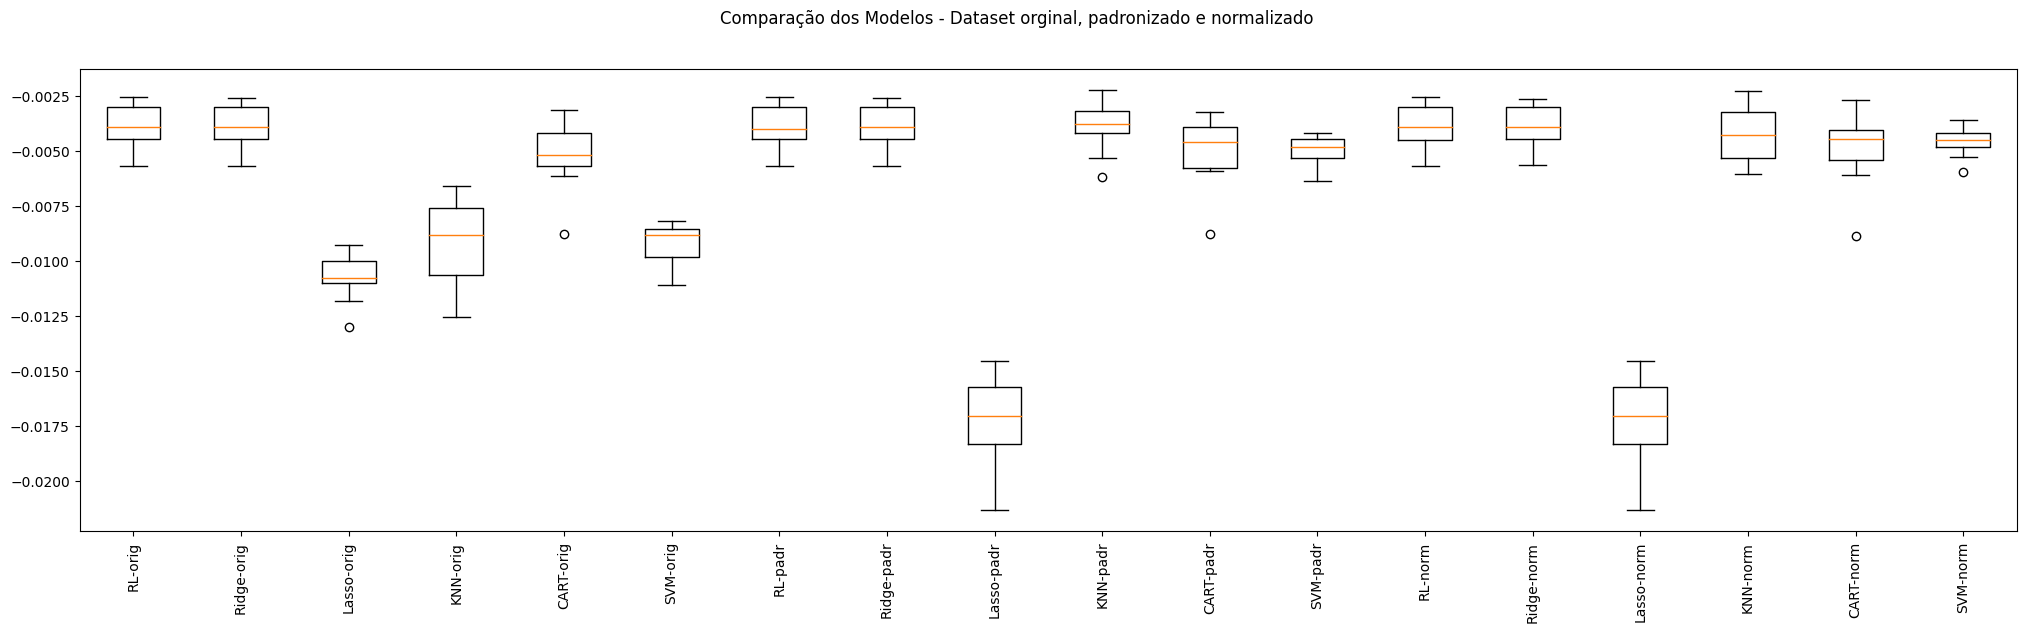

In [62]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_lin = ('LR', LinearRegression())
ridge_reg = ('Ridge', Ridge())
lasso_reg = ('Lasso', Lasso())
KNN = ('KNN', KNeighborsRegressor())
CART = ('CART', DecisionTreeRegressor())
SVM = ('SVM', SVR())

# Transformações que serão utilizadas

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('RL-orig', Pipeline([reg_lin])))
pipelines.append(('Ridge-orig', Pipeline([ridge_reg])))
pipelines.append(('Lasso-orig', Pipeline([lasso_reg])))
pipelines.append(('KNN-orig', Pipeline([KNN])))
pipelines.append(('CART-orig', Pipeline([CART])))
pipelines.append(('SVM-orig', Pipeline([SVM])))

# Dataset Padronizado
pipelines.append(('RL-padr', Pipeline([standard_scaler, reg_lin])))
pipelines.append(('Ridge-padr', Pipeline([standard_scaler, ridge_reg])))
pipelines.append(('Lasso-padr', Pipeline([standard_scaler, lasso_reg])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, KNN])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, CART])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, SVM])))

# Dataset Normalizado
pipelines.append(('RL-norm', Pipeline([min_max_scaler, reg_lin])))
pipelines.append(('Ridge-norm', Pipeline([min_max_scaler, ridge_reg])))
pipelines.append(('Lasso-norm', Pipeline([min_max_scaler, lasso_reg])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, KNN])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, CART])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, SVM])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: MSE %0.5f (%0.5f) - RMSE %0.5f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    nova_linha = {'Modelo': name, 'RMSE': np.sqrt(abs(cv_results.mean()))}
    final_results = final_results.append(nova_linha, ignore_index=True)
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### 3.2 Criação e avaliação de modelos: dados padronizados e normalizados com feature selection

RL-orig-fs: MSE 0.00390 (0.00091) - RMSE 0.06247
Ridge-orig-fs: MSE 0.00390 (0.00090) - RMSE 0.06247
Lasso-orig-fs: MSE 0.01075 (0.00118) - RMSE 0.10369
KNN-orig-fs: MSE 0.00373 (0.00111) - RMSE 0.06111
CART-orig-fs: MSE 0.00439 (0.00122) - RMSE 0.06624
SVM-orig-fs: MSE 0.00438 (0.00053) - RMSE 0.06615
RL-padr-fs: MSE 0.00390 (0.00091) - RMSE 0.06247
Ridge-padr-fs: MSE 0.00390 (0.00090) - RMSE 0.06245
Lasso-padr-fs: MSE 0.01719 (0.00190) - RMSE 0.13110
KNN-padr-fs: MSE 0.00311 (0.00063) - RMSE 0.05576
CART-padr-fs: MSE 0.00441 (0.00115) - RMSE 0.06638
SVM-padr-fs: MSE 0.00377 (0.00083) - RMSE 0.06138
RL-norm-fs: MSE 0.00390 (0.00091) - RMSE 0.06247
Ridge-norm-fs: MSE 0.00393 (0.00090) - RMSE 0.06271
Lasso-norm-fs: MSE 0.01719 (0.00190) - RMSE 0.13110
KNN-norm-fs: MSE 0.00297 (0.00083) - RMSE 0.05447
CART-norm-fs: MSE 0.00460 (0.00126) - RMSE 0.06782
SVM-norm-fs: MSE 0.00374 (0.00080) - RMSE 0.06113


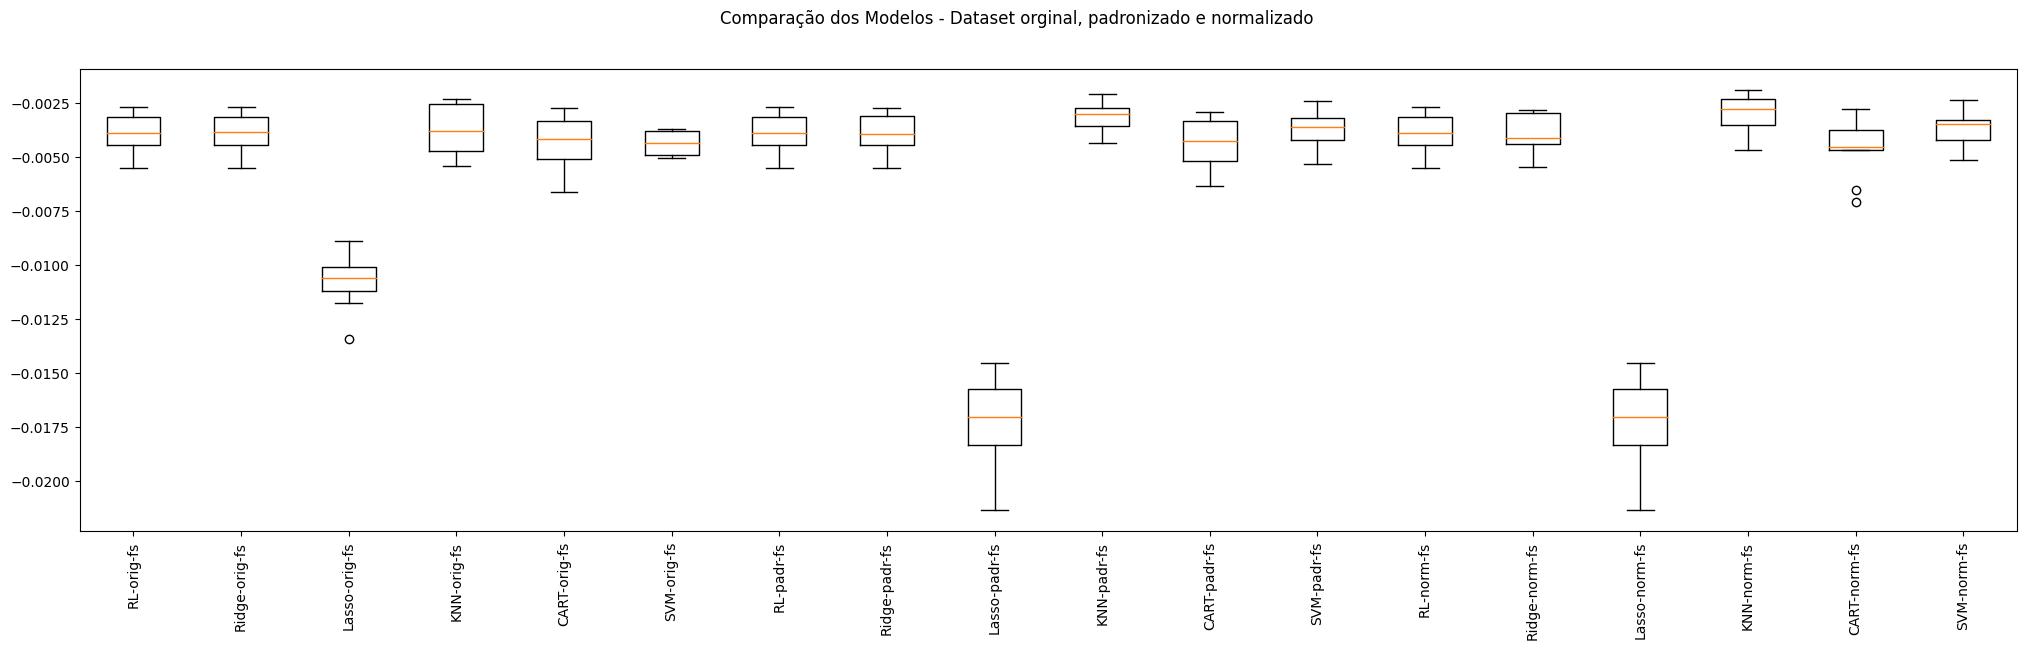

In [63]:
np.random.seed(9) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_lin = ('LR', LinearRegression())
ridge_reg = ('Ridge', Ridge())
lasso_reg = ('Lasso', Lasso())
KNN = ('KNN', KNeighborsRegressor())
CART = ('CART', DecisionTreeRegressor())
SVM = ('SVM', SVR())

# Transformações que serão utilizadas

standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('RL-orig-fs', Pipeline([reg_lin])))
pipelines.append(('Ridge-orig-fs', Pipeline([ridge_reg])))
pipelines.append(('Lasso-orig-fs', Pipeline([lasso_reg])))
pipelines.append(('KNN-orig-fs', Pipeline([KNN])))
pipelines.append(('CART-orig-fs', Pipeline([CART])))
pipelines.append(('SVM-orig-fs', Pipeline([SVM])))

# Dataset Padronizado
pipelines.append(('RL-padr-fs', Pipeline([standard_scaler, reg_lin])))
pipelines.append(('Ridge-padr-fs', Pipeline([standard_scaler, ridge_reg])))
pipelines.append(('Lasso-padr-fs', Pipeline([standard_scaler, lasso_reg])))
pipelines.append(('KNN-padr-fs', Pipeline([standard_scaler, KNN])))
pipelines.append(('CART-padr-fs', Pipeline([standard_scaler, CART])))
pipelines.append(('SVM-padr-fs', Pipeline([standard_scaler, SVM])))

# Dataset Normalizado
pipelines.append(('RL-norm-fs', Pipeline([min_max_scaler, reg_lin])))
pipelines.append(('Ridge-norm-fs', Pipeline([min_max_scaler, ridge_reg])))
pipelines.append(('Lasso-norm-fs', Pipeline([min_max_scaler, lasso_reg])))
pipelines.append(('KNN-norm-fs', Pipeline([min_max_scaler, KNN])))
pipelines.append(('CART-norm-fs', Pipeline([min_max_scaler, CART])))
pipelines.append(('SVM-norm-fs', Pipeline([min_max_scaler, SVM])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train_FS, y_train_FS, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: MSE %0.5f (%0.5f) - RMSE %0.5f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    nova_linha = {'Modelo': name, 'RMSE': np.sqrt(abs(cv_results.mean()))}
    final_results = final_results.append(nova_linha, ignore_index=True)
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [64]:
final_results.sort_values(by = 'RMSE', ascending = True).head(5)

,Modelo,RMSE
33,KNN-norm-fs,0.054469
27,KNN-padr-fs,0.055758
21,KNN-orig-fs,0.061106
35,SVM-norm-fs,0.061131
29,SVM-padr-fs,0.061379


Analisando o resultado final do treinamento dos modelos, podemos concluir que o modelo KNN normalizado com a tecnica de feature selection teve resultados melhores que os outros modelos. Podemos notar tambem que todos os 5 melhores modelos contaram com a técnica de feature selection, mostrando que os outros atributos estavam mais atrapalhando o modelo do que ajudando.

### 3.3 Otimização dos hiperparâmetros

Nesta etapa, será feito a otimização dos parametros do modelo que se saiu melhor nos testes anteriores.

In [65]:
# Tuning do KNN

np.random.seed(9) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsRegressor())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error' )
    grid.fit(X_train_FS, y_train_FS)
    # imprime a melhor configuração
    print("%s - Melhor: %f usando %s" % (name, np.sqrt(abs(grid.best_score_)), grid.best_params_))

knn-orig - Melhor: 0.059206 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 7}
knn-padr - Melhor: 0.053207 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}
knn-norm - Melhor: 0.053035 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 7}


Os melhores parametros encontrados pelo GridSearch para o modelo KNN com esses dados foi usando o dataset normalizado, com a métrica eclideana e com o numero de pontos considerados igual a 7.

## Finalização do Modelo

In [66]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
norm = MinMaxScaler().fit(X_train_FS) # ajuste do scaler com o conjunto de treino
rescaledX = norm.transform(X_train_FS) # aplicação da padronização no conjunto de treino
model = KNeighborsRegressor(n_neighbors = 7, metric = 'euclidean')
model.fit(rescaledX, y_train_FS)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = norm.transform(X_test_FS) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
mse = mean_squared_error(y_test_FS, predictions)
r2 = r2_score(y_test_FS, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Mean Squared Error: 0.00230130074007625
Root Mean Squared Error: 0.04797187446907041
R2 Score: 0.8978469987351052


Mean Squared Error: 0.003390069190069188\
Root Mean Squared Error: 0.05822430068338467\
R2 Score: 0.8495173897828998

In [70]:
# Preparação do modelo com TODO o dataset
norm = MinMaxScaler().fit(X_FS) # ajuste do scaler com TODO o dataset
rescaledX = norm.transform(X_FS) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y_FS)

KNeighborsRegressor(metric='euclidean', n_neighbors=7)

## Simulando a aplicação do modelo em dados não vistos

In [71]:
dataset_ML_FS.columns.values

array(['Deep sleep percentage', 'Light sleep percentage', 'Awakenings',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency',
       'Sleep efficiency'], dtype=object)

In [73]:
# Novos dados - não sabemos a classe!
data = {'Deep sleep percentage': [0.08, 0.05, 0.20],
        'Light sleep percentage': [0.86,0.92, 0.40],
        'Awakenings' : [0,1,2],
        'Alcohol consumption' : [0,0,0],
        'Smoking status' : [0,0,0],
        'Exercise frequency' : [3,2,2],
        }

atributos = dataset_ML_FS.columns.values
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:6].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = norm.transform(X_entrada)
print(rescaledEntradaX)

[[-0.314 -0.11   0.     0.     0.     0.6  ]
 [-0.315 -0.109  0.25   0.     0.     0.4  ]
 [-0.312 -0.118  0.5    0.     0.     0.4  ]]


In [74]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0.949 0.774 0.699]
